In [9]:
# 🎬 TMDB 5000 Credits Dataset - Exploratory Data Analysis (EDA)

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

%matplotlib inline
pd.set_option('display.max_columns', None)


In [10]:
# Load dataset
df = pd.read_csv("tmdb_5000_credits.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [12]:
# Missing values
df.isnull().sum()


movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [13]:
# 🔍 Parse JSON-like columns (cast & crew)
def parse_data(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['cast_parsed'] = df['cast'].apply(parse_data)
df['crew_parsed'] = df['crew'].apply(parse_data)


C:\Users\acer\AppData\Local\Temp\ipykernel_7488\1914055670.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Actor', x='Movie_Count', data=top_actors, palette="mako")


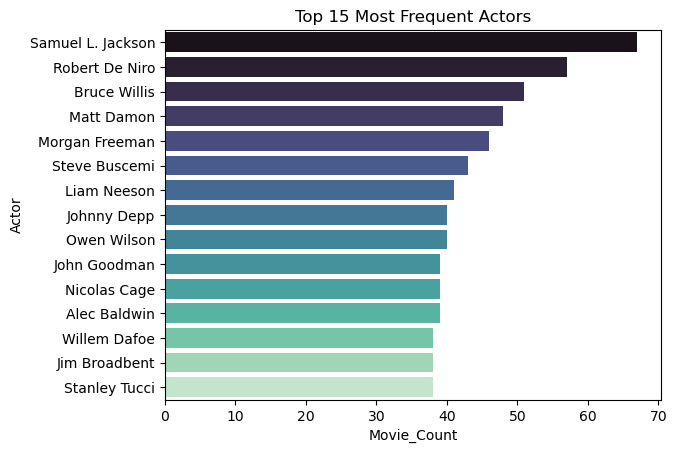

In [14]:
# Extract top actors
all_actors = [member['name'] for sublist in df['cast_parsed'] for member in sublist if 'name' in member]
actor_counts = Counter(all_actors)

top_actors = pd.DataFrame(actor_counts.most_common(15), columns=['Actor','Movie_Count'])

sns.barplot(y='Actor', x='Movie_Count', data=top_actors, palette="mako")
plt.title("Top 15 Most Frequent Actors")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_7488\4972568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=director_counts.index, x=director_counts.values, palette="rocket")


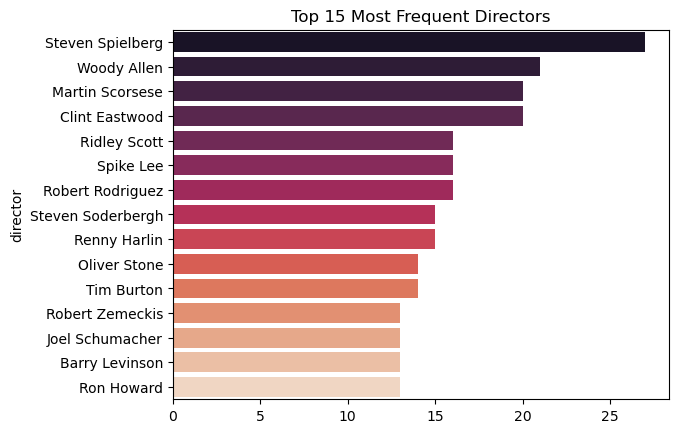

In [15]:
# Extract top directors
def get_director(crew_list):
    for member in crew_list:
        if member.get('job') == 'Director':
            return member['name']
    return None

df['director'] = df['crew_parsed'].apply(get_director)

director_counts = df['director'].value_counts().head(15)

sns.barplot(y=director_counts.index, x=director_counts.values, palette="rocket")
plt.title("Top 15 Most Frequent Directors")
plt.show()


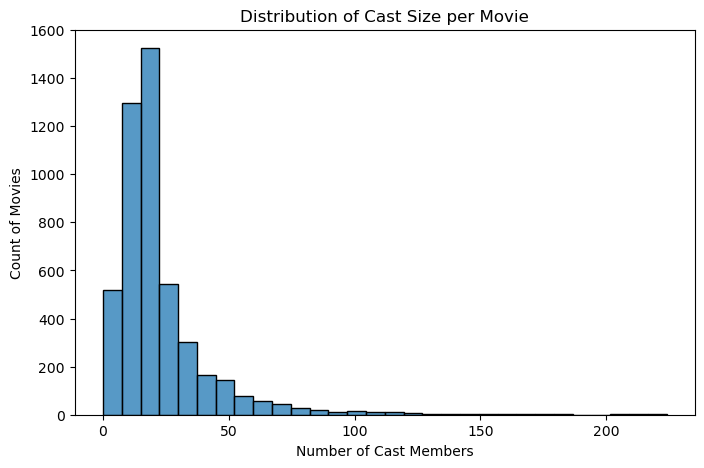

In [16]:
# Distribution of cast size
df['cast_size'] = df['cast_parsed'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['cast_size'], bins=30, kde=False)
plt.title("Distribution of Cast Size per Movie")
plt.xlabel("Number of Cast Members")
plt.ylabel("Count of Movies")
plt.show()


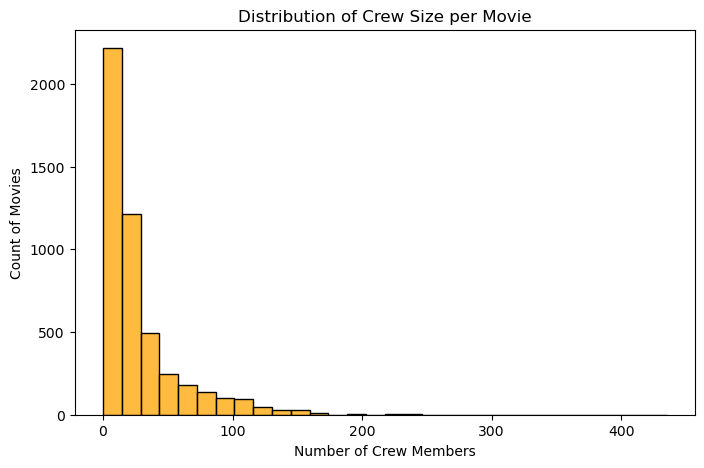

In [17]:
# Distribution of crew size
df['crew_size'] = df['crew_parsed'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['crew_size'], bins=30, kde=False, color='orange')
plt.title("Distribution of Crew Size per Movie")
plt.xlabel("Number of Crew Members")
plt.ylabel("Count of Movies")
plt.show()


In [18]:
# ✅ Conclusion
print("✔ Dataset loaded & inspected")
print("✔ Extracted actors & directors")
print("✔ Visualized top actors & directors")
print("✔ Analyzed cast & crew size distribution")


✔ Dataset loaded & inspected
✔ Extracted actors & directors
✔ Visualized top actors & directors
✔ Analyzed cast & crew size distribution
